In [ ]:
print('MY MACHINE LEARNING NOTEBOOK PIECE')

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score, jaccard_score

In [62]:
!wget -O loan.csv https://raw.githubusercontent.com/studyfree20/data/main/loan.csv

--2020-10-31 16:50:31--  https://raw.githubusercontent.com/studyfree20/data/main/loan.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22754 (22K) [text/plain]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  22.22K  --.-KB/s    in 0.002s  

2020-10-31 16:50:32 (13.4 MB/s) - ‘loan.csv’ saved [22754/22754]



In [5]:
df = pd.read_csv('loan.csv')
df.head()

,user_id,un_named,status,principal_amount,terms,effective_date,due_date,age,education,Gender
0,0,0,PAID,1500,30,09/08/2019,10/07/2019,47,Secondary or Below,male
1,2,2,PAID,1500,30,09/08/2019,10/07/2019,33,Bachelors,female
2,3,3,PAID,1500,15,09/08/2019,9/22/2019,27,college,male
3,4,4,PAID,1500,30,09/09/2019,10/08/2019,28,college,female
4,6,6,PAID,1500,30,09/09/2019,10/08/2019,29,college,male


In [6]:
df.shape

(346, 10)

In [7]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,user_id,un_named,status,principal_amount,terms,effective_date,due_date,age,education,Gender
0,0,0,PAID,1500,30,2019-09-08,2019-10-07,47,Secondary or Below,male
1,2,2,PAID,1500,30,2019-09-08,2019-10-07,33,Bachelors,female
2,3,3,PAID,1500,15,2019-09-08,2019-09-22,27,college,male
3,4,4,PAID,1500,30,2019-09-09,2019-10-08,28,college,female
4,6,6,PAID,1500,30,2019-09-09,2019-10-08,29,college,male


In [9]:
df['status'].value_counts()

PAID          260
COLLECTION     86
Name: status, dtype: int64

In [14]:
df.dtypes

user_id                      int64
un_named                     int64
status                      object
principal_amount             int64
terms                        int64
effective_date      datetime64[ns]
due_date            datetime64[ns]
age                          int64
education                   object
Gender                      object
dtype: object

In [13]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df[['effective_date', 'due_date']].head(3)

,effective_date,due_date
0,2019-09-08,2019-10-07
1,2019-09-08,2019-10-07
2,2019-09-08,2019-09-22


In [15]:
df['principal_amount'].value_counts(normalize = True)

1500    0.745665
950     0.234104
300     0.008671
500     0.005780
900     0.005780
Name: principal_amount, dtype: float64

In [16]:
df['status'].value_counts(normalize=True)

PAID          0.751445
COLLECTION    0.248555
Name: status, dtype: float64

In [17]:
df['education'].value_counts()

Secondary or Below    151
college               149
Bachelors              44
Master or Above         2
Name: education, dtype: int64

In [18]:
df['Gender'].value_counts(normalize=True)

male      0.849711
female    0.150289
Name: Gender, dtype: float64

In [19]:
df.groupby(['Gender'])['status'].value_counts(normalize=True)

Gender  status    
female  PAID          0.865385
        COLLECTION    0.134615
male    PAID          0.731293
        COLLECTION    0.268707
Name: status, dtype: float64

In [20]:
df.groupby(['education'])['status'].value_counts(normalize=True)

education           status    
Bachelors           PAID          0.750000
                    COLLECTION    0.250000
Master or Above     COLLECTION    0.500000
                    PAID          0.500000
Secondary or Below  PAID          0.741722
                    COLLECTION    0.258278
college             PAID          0.765101
                    COLLECTION    0.234899
Name: status, dtype: float64

In [21]:
df.groupby(['principal_amount'])['status'].value_counts(normalize=True)

principal_amount  status    
300               PAID          1.000000
500               PAID          1.000000
900               PAID          1.000000
950               PAID          0.777778
                  COLLECTION    0.222222
1500              PAID          0.736434
                  COLLECTION    0.263566
Name: status, dtype: float64

In [22]:
#!conda install -c anaconda seaborn -y

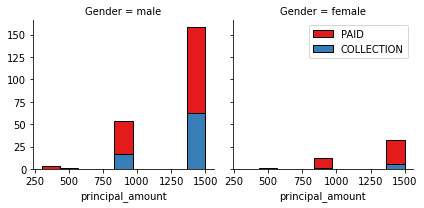

In [24]:
import seaborn as sns

bins = np.linspace(df.principal_amount.min(), df.principal_amount.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'principal_amount', bins=bins, ec="k")

g.axes[1].legend()
plt.show()

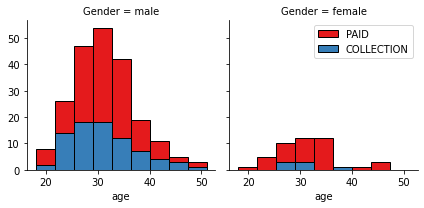

In [25]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[1].legend()
plt.show()

In [26]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head(2)

,user_id,un_named,status,principal_amount,terms,effective_date,due_date,age,education,Gender
0,0,0,PAID,1500,30,2019-09-08,2019-10-07,47,Secondary or Below,0
1,2,2,PAID,1500,30,2019-09-08,2019-10-07,33,Bachelors,1


In [27]:
df['dayofweek'] = df['effective_date'].dt.dayofweek # Monday:0, Sunday:6
df.head(3)

,user_id,un_named,status,principal_amount,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAID,1500,30,2019-09-08,2019-10-07,47,Secondary or Below,0,6
1,2,2,PAID,1500,30,2019-09-08,2019-10-07,33,Bachelors,1,6
2,3,3,PAID,1500,15,2019-09-08,2019-09-22,27,college,0,6


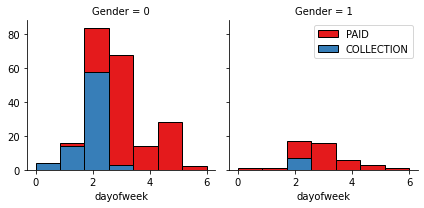

In [29]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 8)
g = sns.FacetGrid(df, col="Gender", hue="status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [30]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head(3)

,user_id,un_named,status,principal_amount,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAID,1500,30,2019-09-08,2019-10-07,47,Secondary or Below,0,6,1
1,2,2,PAID,1500,30,2019-09-08,2019-10-07,33,Bachelors,1,6,1
2,3,3,PAID,1500,15,2019-09-08,2019-09-22,27,college,0,6,1


In [31]:
Feature = df[['principal_amount','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)

Feature.head(3)

,principal_amount,terms,age,Gender,weekend,Bachelors,Master or Above,Secondary or Below,college
0,1500,30,47,0,1,0,0,1,0
1,1500,30,33,1,1,1,0,0,0
2,1500,15,27,0,1,0,0,0,1


In [32]:
X = Feature
X[0:5]

,principal_amount,terms,age,Gender,weekend,Bachelors,Master or Above,Secondary or Below,college
0,1500,30,47,0,1,0,0,1,0
1,1500,30,33,1,1,1,0,0,0
2,1500,15,27,0,1,0,0,0,1
3,1500,30,28,1,0,0,0,0,1
4,1500,30,29,0,0,0,0,0,1


In [33]:
y = df['status'].values
y[0:5]

array(['PAID', 'PAID', 'PAID', 'PAID', 'PAID'], dtype=object)

In [34]:
X_raw = X.values
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

array([[ 0.56442605,  0.92071769,  2.63424557, -0.42056004,  2.32538328,
        -0.38170062, -0.07624929,  1.13639374, -0.86968108],
       [ 0.56442605,  0.92071769,  0.33468069,  2.37778177,  2.32538328,
         2.61985426, -0.07624929, -0.87997669, -0.86968108]])

In [35]:
X_raw[0:2]

array([[1500,   30,   47,    0,    1,    0,    0,    1,    0],
       [1500,   30,   33,    1,    1,    1,    0,    0,    0]])

In [69]:
def model_eval_plt(par, F1, Jac, model_name, model_par_name):
    # plot model accuracy for different values of k (k: number of neighbors)
    plt.figure(figsize=(10,5))
    plt.plot(par, F1, 'b', linewidth = 2)
    plt.plot(par, Jac, 'g', linewidth = 2)
    plt.legend(['F1', 'Jaccard'], fontsize = 20)
    plt.ylabel('Accuracy', fontsize = 20)
    plt.xlabel('{}'.format(model_par_name),  fontsize = 20)
    plt.title('{} evaluation'.format(model_name), fontsize = 25)
#     plt.xticks(range(1, Ks), range(1, Ks), fontsize = 15)
    plt.yticks( fontsize = 15)
    plt.grid()
    plt.show()
    print('The highest Jaccard similarity index is {:3.3} for {}= {}'.format(max(Jac), 
                                                                             model_par_name,
                                                                             par[np.argmax(Jac)]))
    print('The highest F1 score is {:3.3} for {}= {}'.format(max(F1), 
                                                        model_par_name,
                                                        par[np.argmax(F1)]))

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, jaccard_similarity_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
Ks = 20 # number of neighbors for KNN method
Jac_vals = np.zeros((Ks-1))
F1_vals = np.zeros((Ks-1))

for n in range(1, Ks):
    # Build the model
    knn = KNeighborsClassifier(n_neighbors=n)
    # perform a k-fold cross-validation to estimate the model accuracy
    folds = 10
    kfold = KFold(folds, True, 1)
    n2 = 0
    Jac_kfold_vals = np.zeros((folds))
    f1_kfold_vals = np.zeros((folds))
    # enumerate splits
    for train_index, test_index in kfold.split(X):
        knn.fit(X[train_index], y[train_index])
        yhat = knn.predict(X[test_index])
        Jac_kfold_vals[n2] = jaccard_similarity_score(y[test_index], yhat)
        f1_kfold_vals[n2] = f1_score(y[test_index], yhat,
                                     labels = ['PAID'], average='micro')
        n2+=1
        
    # compute the mean accuracy based on accuracy of k-folds 
    Jac_vals[n-1] = Jac_kfold_vals.mean()
    F1_vals[n-1] = f1_kfold_vals.mean()

# plot model evaluation and find the optimum parameter
model_par_name = 'Number of neighbors (K)'
model_name = 'KNN'
model_eval_plt(list(range(1, Ks)), F1_vals, Jac_vals, model_name, model_par_name)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

array([0.5       , 0.45714286, 0.52857143, 0.48571429, 0.55714286,
       0.51428571, 0.57142857, 0.54285714, 0.6       , 0.58571429,
       0.6       ])

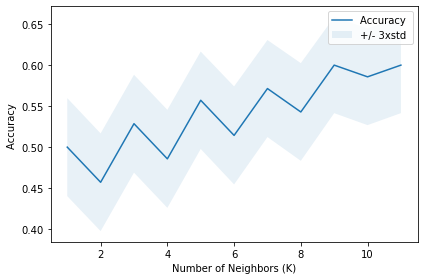

The best accuracy was with 0.6 with k= 9


In [41]:
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, y_train)

In [67]:

def model_eval_plt(par, F1, Jac, model_name, model_par_name):
    # plot model accuracy for different values of k (k: number of neighbors)
    plt.figure(figsize=(10,5))
    plt.plot(par, F1, 'b', linewidth = 2)
    plt.plot(par, Jac, 'g', linewidth = 2)
    plt.legend(['F1', 'Jaccard'], fontsize = 20)
    plt.ylabel('Accuracy', fontsize = 20)
    plt.xlabel('{}'.format(model_par_name),  fontsize = 20)
    plt.title('{} evaluation'.format(model_name), fontsize = 25)
#     plt.xticks(range(1, Ks), range(1, Ks), fontsize = 15)
    plt.yticks( fontsize = 15)
    plt.grid()
    plt.show()
    print('The highest Jaccard similarity index is {:3.3} for {}= {}'.format(max(Jac), 
                                                                             model_par_name,
                                                                             par[np.argmax(Jac)]))
    print('The highest F1 score is {:3.3} for {}= {}'.format(max(F1), 
                                                        model_par_name,
                                                        par[np.argmax(F1)]))

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, jaccard_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
Ks = 20 # number of neighbors for KNN method
Jac_vals = np.zeros((Ks-1))
F1_vals = np.zeros((Ks-1))

for n in range(1, Ks):
    # Build the model
    knn = KNeighborsClassifier(n_neighbors=n)
    # perform a k-fold cross-validation to estimate the model accuracy
    folds = 10
    kfold = KFold(folds, True, 1)
    n2 = 0
    Jac_kfold_vals = np.zeros((folds))
    f1_kfold_vals = np.zeros((folds))
    # enumerate splits
    for train_index, test_index in kfold.split(X):
        knn.fit(X[train_index], y[train_index])
        yhat = knn.predict(X[test_index])
        Jac_kfold_vals[n2] = jaccard_score(y[test_index], yhat)
        f1_kfold_vals[n2] = f1_score(y[test_index], yhat,
                                     labels = ['PAID'], average='micro')
        n2+=1
        
    # compute the mean accuracy based on accuracy of k-folds 
    Jac_vals[n-1] = Jac_kfold_vals.mean()
    F1_vals[n-1] = f1_kfold_vals.mean()

# plot model evaluation and find the optimum parameter
model_par_name = 'Number of neighbors (K)'
model_name = 'KNN'
model_eval_plt(list(range(1, Ks)), F1_vals, Jac_vals, model_name, model_par_name)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


NameError: name 'X' is not defined

In [5]:
from sklearn.tree import DecisionTreeClassifier
maxDepths = 20
f1_vals = np.zeros((maxDepths-1))
Jac_vals = np.zeros((maxDepths-1))
for n in range(1, maxDepths):
    # Build the model
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    # perform a k-fold cross-validation to estimate the model accuracy
    folds = 10
    kfold = KFold(folds, True, 1)
    n2 = 0
    f1_kfold_vals = np.zeros((folds))
    Jac_kfold_vals = np.zeros((folds))
    # enumerate splits
    for train_index, test_index in kfold.split(X):
        loanTree.fit(X_raw[train_index], y[train_index])
        yhat = loanTree.predict(X_raw[test_index])
        f1_kfold_vals[n2] = f1_score(y[test_index], yhat,
                                     labels = ['PAIDOFF'], average='micro')
        Jac_kfold_vals[n2] = jaccard_score(y[test_index], yhat)
        n2+=1
        
    # compute the mean accuracy based on accuracy of k-folds 
    f1_vals[n-1] = f1_kfold_vals.mean()
    Jac_vals[n-1] = Jac_kfold_vals.mean()


# plot model evaluation and find the optimum parameter
model_par_name = 'Max depth of decision tree'
model_name = 'Decision Tree'
model_eval_plt(list(range(1, maxDepths)), f1_vals, Jac_vals, model_name, model_par_name)


NameError: name 'X' is not defined